# Stocks recommendation based on risk reward metric



# 1.Description

The principal source for historic stock data is yahoo finance.

1.1. CONTEXT

The main objetive is to recommend stocks based on risk reward metric by computing it's percentage change in closing price and statistical parameters such as normal mean and standard deviation.

1.2. PROBLEM STATEMENT

Computing percentage change for every session of stock exchange and it's mean and standard deviation. Additionally, on an average 21 sessions are held in a month and 252 in a year so returns for different time frames can be calculated easily as per requirement.

# 2.Data Pre-processing

In [159]:
# Import all the libraries

import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
# Creating a list of tickers for stocks that are to be analysed

Tickers = ["META", "AMZN", "AAPL", "NFLX", "GOOG"]

In [161]:
# Download the Individual stock price and volume data for a decade from 2010-01-01 to 2019-12-31

Stocks = yf.download(Tickers,start="2010-01-01",end="2019-12-31")

[*********************100%***********************]  5 of 5 completed


In [162]:
# Quick overview of some of the top rows of the Stocks Dataframe

Stocks.head()

Adj Close                                    \
                               AAPL    AMZN       GOOG META      NFLX   
Date                                                                    
2010-01-04 00:00:00-05:00  6.526020  6.6950  15.610239  NaN  7.640000   
2010-01-05 00:00:00-05:00  6.537303  6.7345  15.541497  NaN  7.358571   
2010-01-06 00:00:00-05:00  6.433319  6.6125  15.149715  NaN  7.617143   
2010-01-07 00:00:00-05:00  6.421425  6.5000  14.797037  NaN  7.485714   
2010-01-08 00:00:00-05:00  6.464117  6.6760  14.994298  NaN  7.614286   

                              Close                                    ...  \
                               AAPL    AMZN       GOOG META      NFLX  ...   
Date                                                                   ...   
2010-01-04 00:00:00-05:00  7.643214  6.6950  15.610239  NaN  7.640000  ...   
2010-01-05 00:00:00-05:00  7.656429  6.7345  15.541497  NaN  7.358571  ...   
2010-01-06 00:00:00-05:00  7.534643  6.6125  15.149715  NaN  7.617143  ...   
2010-01-07 00:00:00-05:00  7.520714  6.5000  14.797037  NaN  7.485714  ...   
2010-01-08 00:00:00-05:00  7.570714  6.6760  14.994298  NaN  7.614286  ...   

                               Open                                    \
                               AAPL    AMZN       GOOG META      NFLX   
Date                                                                    
2010-01-04 00:00:00-05:00  7.622500  6.8125  15.615220  NaN  7.931429   
2010-01-05 00:00:00-05:00  7.664286  6.6715  15.620949  NaN  7.652857   
2010-01-06 00:00:00-05:00  7.656429  6.7300  15.588072  NaN  7.361429   
2010-01-07 00:00:00-05:00  7.562500  6.6005  15.178109  NaN  7.731429   
2010-01-08 00:00:00-05:00  7.510714  6.5280  14.744733  NaN  7.498571   

                              Volume                                       
                                AAPL       AMZN       GOOG META      NFLX  
Date                                                                       
2010-01-04 00:00:00-05:00  493729600  151998000   78541293  NaN  17239600  
2010-01-05 00:00:00-05:00  601904800  177038000  120638494  NaN  23753100  
2010-01-06 00:00:00-05:00  552160000  143576000  159744526  NaN  23290400  
2010-01-07 00:00:00-05:00  477131200  220604000  257533695  NaN   9955400  
2010-01-08 00:00:00-05:00  447610800  196610000  189680313  NaN   8180900  

[5 rows x 30 columns]

In [163]:
# Quick overview of some of the last rows of Stocks Dataframe

Stocks.tail()

Adj Close                                    \
                                AAPL       AMZN       GOOG        META   
Date                                                                     
2019-12-23 00:00:00-05:00  69.672501  89.650002  67.442001  206.179993   
2019-12-24 00:00:00-05:00  69.738731  89.460503  67.178001  205.119995   
2019-12-26 00:00:00-05:00  71.122360  93.438499  68.019997  207.789993   
2019-12-27 00:00:00-05:00  71.095383  93.489998  67.594498  208.100006   
2019-12-30 00:00:00-05:00  71.517334  92.344498  66.806999  204.410004   

                                           Close                        \
                                 NFLX       AAPL       AMZN       GOOG   
Date                                                                     
2019-12-23 00:00:00-05:00  333.100006  71.000000  89.650002  67.442001   
2019-12-24 00:00:00-05:00  333.200012  71.067497  89.460503  67.178001   
2019-12-26 00:00:00-05:00  332.630005  72.477501  93.438499  68.019997   
2019-12-27 00:00:00-05:00  329.089996  72.449997  93.489998  67.594498   
2019-12-30 00:00:00-05:00  323.309998  72.879997  92.344498  66.806999   

                                                   ...       Open             \
                                 META        NFLX  ...       AAPL       AMZN   
Date                                               ...                         
2019-12-23 00:00:00-05:00  206.179993  333.100006  ...  70.132500  89.413002   
2019-12-24 00:00:00-05:00  205.119995  333.200012  ...  71.172501  89.690498   
2019-12-26 00:00:00-05:00  207.789993  332.630005  ...  71.205002  90.050499   
2019-12-27 00:00:00-05:00  208.100006  329.089996  ...  72.779999  94.146004   
2019-12-30 00:00:00-05:00  204.410004  323.309998  ...  72.364998  93.699997   

                                                                 Volume  \
                                GOOG        META        NFLX       AAPL   
Date                                                                      
2019-12-23 00:00:00-05:00  67.793503  206.699997  337.760010   98572000   
2019-12-24 00:00:00-05:00  67.425003  206.300003  334.010010   48478800   
2019-12-26 00:00:00-05:00  67.308502  205.570007  334.600006   93121200   
2019-12-27 00:00:00-05:00  68.149498  208.669998  332.959991  146266000   
2019-12-30 00:00:00-05:00  67.500000  207.860001  329.079987  144114400   

                                                                     
                                AMZN      GOOG        META     NFLX  
Date                                                                 
2019-12-23 00:00:00-05:00   42728000  17662000  13348900.0  5765300  
2019-12-24 00:00:00-05:00   17626000   6950000   6046300.0  2019300  
2019-12-26 00:00:00-05:00  120108000  13350000   9350700.0  3589900  
2019-12-27 00:00:00-05:00  123732000  20768000  10284200.0  5036100  
2019-12-30 00:00:00-05:00   73494000  21018000  10524300.0  4311500  

[5 rows x 30 columns]

In [164]:
# It is unconfirmed but obvious from the Stocks overview that only META has NaN values in other columns of the dataframe.

In [165]:
# Converting the dataframe to a csv file

Stocks.to_csv("Stocks_maang.csv")

In [166]:
# Reading the csv file

Stocks = pd.read_csv("Stocks_maang.csv")
Stocks

,Unnamed: 0,Adj Close,Adj Close.1,Adj Close.2,Adj Close.3,Adj Close.4,Close,Close.1,Close.2,Close.3,...,Open,Open.1,Open.2,Open.3,Open.4,Volume,Volume.1,Volume.2,Volume.3,Volume.4
0,NaN,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,...,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-04 00:00:00-05:00,6.526020050048828,6.695000171661377,15.610239028930664,NaN,7.639999866485596,7.643214225769043,6.695000171661377,15.610239028930664,NaN,...,7.622499942779541,6.8125,15.615220069885254,NaN,7.931428909301758,493729600,151998000,78541293,NaN,17239600
3,2010-01-05 00:00:00-05:00,6.537303447723389,6.734499931335449,15.541497230529785,NaN,7.3585710525512695,7.656428813934326,6.734499931335449,15.541497230529785,NaN,...,7.664286136627197,6.671500205993652,15.620948791503906,NaN,7.652856826782227,601904800,177038000,120638494,NaN,23753100
4,2010-01-06 00:00:00-05:00,6.433318614959717,6.612500190734863,15.149715423583984,NaN,7.617143154144287,7.534643173217773,6.612500190734863,15.149715423583984,NaN,...,7.656428813934326,6.730000019073486,15.588071823120117,NaN,7.361429214477539,552160000,143576000,159744526,NaN,23290400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2019-12-23 00:00:00-05:00,69.67250061035156,89.6500015258789,67.44200134277344,206.17999267578125,333.1000061035156,71.0,89.6500015258789,67.44200134277344,206.17999267578125,...,70.13249969482422,89.41300201416016,67.79350280761719,206.6999969482422,337.760009765625,98572000,42728000,17662000,13348900.0,5765300
2513,2019-12-24 00:00:00-05:00,69.73873138427734,89.46050262451172,67.1780014038086,205.1199951171875,333.20001220703125,71.06749725341797,89.46050262451172,67.1780014038086,205.1199951171875,...,71.17250061035156,89.69049835205078,67.42500305175781,206.3000030517578,334.010009765625,48478800,17626000,6950000,6046300.0,2019300
2514,2019-12-26 00:00:00-05:00,71.12236022949219,93.4384994506836,68.0199966430664,207.7899932861328,332.6300048828125,72.47750091552734,93.4384994506836,68.0199966430664,207.7899932861328,...,71.20500183105469,90.05049896240234,67.30850219726562,205.57000732421875,334.6000061035156,93121200,120108000,13350000,9350700.0,3589900
2515,2019-12-27 00:00:00-05:00,71.09538269042969,93.48999786376953,67.59449768066406,208.10000610351562,329.0899963378906,72.44999694824219,93.48999786376953,67.59449768066406,208.10000610351562,...,72.77999877929688,94.14600372314453,68.14949798583984,208.6699981689453,332.9599914550781,146266000,123732000,20768000,10284200.0,5036100


In [167]:
# Count of all Nan values 

Stocks.isna().sum()

Unnamed: 0       1
Adj Close        1
Adj Close.1      1
Adj Close.2      1
Adj Close.3    600
Adj Close.4      1
Close            1
Close.1          1
Close.2          1
Close.3        600
Close.4          1
High             1
High.1           1
High.2           1
High.3         600
High.4           1
Low              1
Low.1            1
Low.2            1
Low.3          600
Low.4            1
Open             1
Open.1           1
Open.2           1
Open.3         600
Open.4           1
Volume           1
Volume.1         1
Volume.2         1
Volume.3       600
Volume.4         1
dtype: int64

In [168]:
#  Rearranging the header rows and index columns by specifying additinal parameters while reading csv for filtering out Nan.

Stocks = pd.read_csv("Stocks_maang.csv", header=[0,1], index_col=0, parse_dates = [0])
Stocks

Adj Close                                    \
                                AAPL       AMZN       GOOG        META   
Date                                                                     
2010-01-04 00:00:00-05:00   6.526020   6.695000  15.610239         NaN   
2010-01-05 00:00:00-05:00   6.537303   6.734500  15.541497         NaN   
2010-01-06 00:00:00-05:00   6.433319   6.612500  15.149715         NaN   
2010-01-07 00:00:00-05:00   6.421425   6.500000  14.797037         NaN   
2010-01-08 00:00:00-05:00   6.464117   6.676000  14.994298         NaN   
...                              ...        ...        ...         ...   
2019-12-23 00:00:00-05:00  69.672501  89.650002  67.442001  206.179993   
2019-12-24 00:00:00-05:00  69.738731  89.460503  67.178001  205.119995   
2019-12-26 00:00:00-05:00  71.122360  93.438499  68.019997  207.789993   
2019-12-27 00:00:00-05:00  71.095383  93.489998  67.594498  208.100006   
2019-12-30 00:00:00-05:00  71.517334  92.344498  66.806999  204.410004   

                                           Close                        \
                                 NFLX       AAPL       AMZN       GOOG   
Date                                                                     
2010-01-04 00:00:00-05:00    7.640000   7.643214   6.695000  15.610239   
2010-01-05 00:00:00-05:00    7.358571   7.656429   6.734500  15.541497   
2010-01-06 00:00:00-05:00    7.617143   7.534643   6.612500  15.149715   
2010-01-07 00:00:00-05:00    7.485714   7.520714   6.500000  14.797037   
2010-01-08 00:00:00-05:00    7.614286   7.570714   6.676000  14.994298   
...                               ...        ...        ...        ...   
2019-12-23 00:00:00-05:00  333.100006  71.000000  89.650002  67.442001   
2019-12-24 00:00:00-05:00  333.200012  71.067497  89.460503  67.178001   
2019-12-26 00:00:00-05:00  332.630005  72.477501  93.438499  68.019997   
2019-12-27 00:00:00-05:00  329.089996  72.449997  93.489998  67.594498   
2019-12-30 00:00:00-05:00  323.309998  72.879997  92.344498  66.806999   

                                                   ...       Open             \
                                 META        NFLX  ...       AAPL       AMZN   
Date                                               ...                         
2010-01-04 00:00:00-05:00         NaN    7.640000  ...   7.622500   6.812500   
2010-01-05 00:00:00-05:00         NaN    7.358571  ...   7.664286   6.671500   
2010-01-06 00:00:00-05:00         NaN    7.617143  ...   7.656429   6.730000   
2010-01-07 00:00:00-05:00         NaN    7.485714  ...   7.562500   6.600500   
2010-01-08 00:00:00-05:00         NaN    7.614286  ...   7.510714   6.528000   
...                               ...         ...  ...        ...        ...   
2019-12-23 00:00:00-05:00  206.179993  333.100006  ...  70.132500  89.413002   
2019-12-24 00:00:00-05:00  205.119995  333.200012  ...  71.172501  89.690498   
2019-12-26 00:00:00-05:00  207.789993  332.630005  ...  71.205002  90.050499   
2019-12-27 00:00:00-05:00  208.100006  329.089996  ...  72.779999  94.146004   
2019-12-30 00:00:00-05:00  204.410004  323.309998  ...  72.364998  93.699997   

                                                                 Volume  \
                                GOOG        META        NFLX       AAPL   
Date                                                                      
2010-01-04 00:00:00-05:00  15.615220         NaN    7.931429  493729600   
2010-01-05 00:00:00-05:00  15.620949         NaN    7.652857  601904800   
2010-01-06 00:00:00-05:00  15.588072         NaN    7.361429  552160000   
2010-01-07 00:00:00-05:00  15.178109         NaN    7.731429  477131200   
2010-01-08 00:00:00-05:00  14.744733         NaN    7.498571  447610800   
...                              ...         ...         ...        ...   
2019-12-23 00:00:00-05:00  67.793503  206.699997  337.760010   98572000   
2019-12-24 00:00:00-05:00  67.425003  206.300003  334.010010   48478800   
2019-12

In [169]:
# Count of all NaN values after rearrangement and filter.

Stocks.isna().sum()

# It is confirmed (reference below o/p)  that only META has NaN values.

Adj Close  AAPL      0
           AMZN      0
           GOOG      0
           META    599
           NFLX      0
Close      AAPL      0
           AMZN      0
           GOOG      0
           META    599
           NFLX      0
High       AAPL      0
           AMZN      0
           GOOG      0
           META    599
           NFLX      0
Low        AAPL      0
           AMZN      0
           GOOG      0
           META    599
           NFLX      0
Open       AAPL      0
           AMZN      0
           GOOG      0
           META    599
           NFLX      0
Volume     AAPL      0
           AMZN      0
           GOOG      0
           META    599
           NFLX      0
dtype: int64

In [170]:
# Determining the type of object of the Columns

type(Stocks.columns)

pandas.core.indexes.multi.MultiIndex

In [171]:
# Index naming for the Multi-Index

Stocks.T.index.set_names(["L1","L2"],inplace=True)
Stocks

L1                         Adj Close                                    \
L2                              AAPL       AMZN       GOOG        META   
Date                                                                     
2010-01-04 00:00:00-05:00   6.526020   6.695000  15.610239         NaN   
2010-01-05 00:00:00-05:00   6.537303   6.734500  15.541497         NaN   
2010-01-06 00:00:00-05:00   6.433319   6.612500  15.149715         NaN   
2010-01-07 00:00:00-05:00   6.421425   6.500000  14.797037         NaN   
2010-01-08 00:00:00-05:00   6.464117   6.676000  14.994298         NaN   
...                              ...        ...        ...         ...   
2019-12-23 00:00:00-05:00  69.672501  89.650002  67.442001  206.179993   
2019-12-24 00:00:00-05:00  69.738731  89.460503  67.178001  205.119995   
2019-12-26 00:00:00-05:00  71.122360  93.438499  68.019997  207.789993   
2019-12-27 00:00:00-05:00  71.095383  93.489998  67.594498  208.100006   
2019-12-30 00:00:00-05:00  71.517334  92.344498  66.806999  204.410004   

L1                                         Close                        \
L2                               NFLX       AAPL       AMZN       GOOG   
Date                                                                     
2010-01-04 00:00:00-05:00    7.640000   7.643214   6.695000  15.610239   
2010-01-05 00:00:00-05:00    7.358571   7.656429   6.734500  15.541497   
2010-01-06 00:00:00-05:00    7.617143   7.534643   6.612500  15.149715   
2010-01-07 00:00:00-05:00    7.485714   7.520714   6.500000  14.797037   
2010-01-08 00:00:00-05:00    7.614286   7.570714   6.676000  14.994298   
...                               ...        ...        ...        ...   
2019-12-23 00:00:00-05:00  333.100006  71.000000  89.650002  67.442001   
2019-12-24 00:00:00-05:00  333.200012  71.067497  89.460503  67.178001   
2019-12-26 00:00:00-05:00  332.630005  72.477501  93.438499  68.019997   
2019-12-27 00:00:00-05:00  329.089996  72.449997  93.489998  67.594498   
2019-12-30 00:00:00-05:00  323.309998  72.879997  92.344498  66.806999   

L1                                                 ...       Open             \
L2                               META        NFLX  ...       AAPL       AMZN   
Date                                               ...                         
2010-01-04 00:00:00-05:00         NaN    7.640000  ...   7.622500   6.812500   
2010-01-05 00:00:00-05:00         NaN    7.358571  ...   7.664286   6.671500   
2010-01-06 00:00:00-05:00         NaN    7.617143  ...   7.656429   6.730000   
2010-01-07 00:00:00-05:00         NaN    7.485714  ...   7.562500   6.600500   
2010-01-08 00:00:00-05:00         NaN    7.614286  ...   7.510714   6.528000   
...                               ...         ...  ...        ...        ...   
2019-12-23 00:00:00-05:00  206.179993  333.100006  ...  70.132500  89.413002   
2019-12-24 00:00:00-05:00  205.119995  333.200012  ...  71.172501  89.690498   
2019-12-26 00:00:00-05:00  207.789993  332.630005  ...  71.205002  90.050499   
2019-12-27 00:00:00-05:00  208.100006  329.089996  ...  72.779999  94.146004   
2019-12-30 00:00:00-05:00  204.410004  323.309998  ...  72.364998  93.699997   

L1                                                               Volume  \
L2                              GOOG        META        NFLX       AAPL   
Date                                                                      
2010-01-04 00:00:00-05:00  15.615220         NaN    7.931429  493729600   
2010-01-05 00:00:00-05:00  15.620949         NaN    7.652857  601904800   
2010-01-06 00:00:00-05:00  15.588072         NaN    7.361429  552160000   
2010-01-07 00:00:00-05:00  15.178109         NaN    7.731429  477131200   
2010-01-08 00:00:00-05:00  14.744733         NaN    7.498571  447610800   
...                              ...         ...         ...        ...   
2019-12-23 00:00:00-05:00  67.793503  206.699997  337.760010   98572000   
2019-12-24 00:00:00-05:00  67.425003  206.300003  334.0

In [172]:
# Searching for a specific date at which NaN ends for META 

meta_data=Stocks.iloc[:,[3,8,13,18,23,28]]
meta_data

L1,Adj Close,Close,High,Low,Open,Volume
L2,META,META,META,META,META,META
Date,,,,,,
2010-01-04 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2019-12-23 00:00:00-05:00,206.179993,206.179993,208.589996,205.679993,206.699997,13348900.0
2019-12-24 00:00:00-05:00,205.119995,205.119995,206.789993,205.000000,206.300003,6046300.0


In [173]:
# It is evident that NaN ends at 2012-05-17. Hence we can conclude that META was listed on NYSE on 2012-05-18.# For fair comparison between stocks we should start from 2012-05-18 i.e drop all NaN from dataframe

Stocks.dropna(inplace=True)
Stocks

L1                         Adj Close                                    \
L2                              AAPL       AMZN       GOOG        META   
Date                                                                     
2012-05-18 00:00:00-04:00  16.173409  10.692500  14.953949   38.230000   
2012-05-21 00:00:00-04:00  17.115671  10.905500  15.295419   34.029999   
2012-05-22 00:00:00-04:00  16.984243  10.766500  14.963912   31.000000   
2012-05-23 00:00:00-04:00  17.398659  10.864000  15.179603   32.000000   
2012-05-24 00:00:00-04:00  17.238867  10.762000  15.035145   33.029999   
...                              ...        ...        ...         ...   
2019-12-23 00:00:00-05:00  69.672501  89.650002  67.442001  206.179993   
2019-12-24 00:00:00-05:00  69.738731  89.460503  67.178001  205.119995   
2019-12-26 00:00:00-05:00  71.122360  93.438499  68.019997  207.789993   
2019-12-27 00:00:00-05:00  71.095383  93.489998  67.594498  208.100006   
2019-12-30 00:00:00-05:00  71.517334  92.344498  66.806999  204.410004   

L1                                         Close                        \
L2                               NFLX       AAPL       AMZN       GOOG   
Date                                                                     
2012-05-18 00:00:00-04:00    9.994286  18.942142  10.692500  14.953949   
2012-05-21 00:00:00-04:00   10.248571  20.045713  10.905500  15.295419   
2012-05-22 00:00:00-04:00    9.672857  19.891787  10.766500  14.963912   
2012-05-23 00:00:00-04:00   10.272857  20.377144  10.864000  15.179603   
2012-05-24 00:00:00-04:00   10.038571  20.190001  10.762000  15.035145   
...                               ...        ...        ...        ...   
2019-12-23 00:00:00-05:00  333.100006  71.000000  89.650002  67.442001   
2019-12-24 00:00:00-05:00  333.200012  71.067497  89.460503  67.178001   
2019-12-26 00:00:00-05:00  332.630005  72.477501  93.438499  68.019997   
2019-12-27 00:00:00-05:00  329.089996  72.449997  93.489998  67.594498   
2019-12-30 00:00:00-05:00  323.309998  72.879997  92.344498  66.806999   

L1                                                 ...       Open             \
L2                               META        NFLX  ...       AAPL       AMZN   
Date                                               ...                         
2012-05-18 00:00:00-04:00   38.230000    9.994286  ...  19.070000  10.970500   
2012-05-21 00:00:00-04:00   34.029999   10.248571  ...  19.089287  10.701500   
2012-05-22 00:00:00-04:00   31.000000    9.672857  ...  20.341070  10.915500   
2012-05-23 00:00:00-04:00   32.000000   10.272857  ...  19.910713  10.735500   
2012-05-24 00:00:00-04:00   33.029999   10.038571  ...  20.566786  10.849000   
...                               ...         ...  ...        ...        ...   
2019-12-23 00:00:00-05:00  206.179993  333.100006  ...  70.132500  89.413002   
2019-12-24 00:00:00-05:00  205.119995  333.200012  ...  71.172501  89.690498   
2019-12-26 00:00:00-05:00  207.789993  332.630005  ...  71.205002  90.050499   
2019-12-27 00:00:00-05:00  208.100006  329.089996  ...  72.779999  94.146004   
2019-12-30 00:00:00-05:00  204.410004  323.309998  ...  72.364998  93.699997   

L1                                                               Volume  \
L2                              GOOG        META        NFLX       AAPL   
Date                                                                      
2012-05-18 00:00:00-04:00  15.569143   42.049999   10.328571  732292400   
2012-05-21 00:00:00-04:00  14.956689   36.529999    9.978571  631106000   
2012-05-22 00:00:00-04:00  15.278732   32.610001   10.257143  694870400   
2012-05-23 00:00:00-04:00  14.985082   31.370001    9.638571  584897600   
2012-05-24 00:00:00-04:00  15.172131   32.950001   10.217143  496230000   
...                              ...         ...         ...        ...   
2019-12-23 00:00:00-05:00  67.793503  206.699997  337.760010   98572000   
2019-12-24 00:00:00-05:00  67.425003  206.300003  334.0

In [174]:
# Extract the Close price of stocks for estimating return 

Close = Stocks.loc[:,"Close"]
Close

L2,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2012-05-18 00:00:00-04:00,18.942142,10.692500,14.953949,38.230000,9.994286
2012-05-21 00:00:00-04:00,20.045713,10.905500,15.295419,34.029999,10.248571
2012-05-22 00:00:00-04:00,19.891787,10.766500,14.963912,31.000000,9.672857
2012-05-23 00:00:00-04:00,20.377144,10.864000,15.179603,32.000000,10.272857
2012-05-24 00:00:00-04:00,20.190001,10.762000,15.035145,33.029999,10.038571
...,...,...,...,...,...
2019-12-23 00:00:00-05:00,71.000000,89.650002,67.442001,206.179993,333.100006
2019-12-24 00:00:00-05:00,71.067497,89.460503,67.178001,205.119995,333.200012
2019-12-26 00:00:00-05:00,72.477501,93.438499,68.019997,207.789993,332.630005


Text(0.5, 1.0, 'Close price over Date')

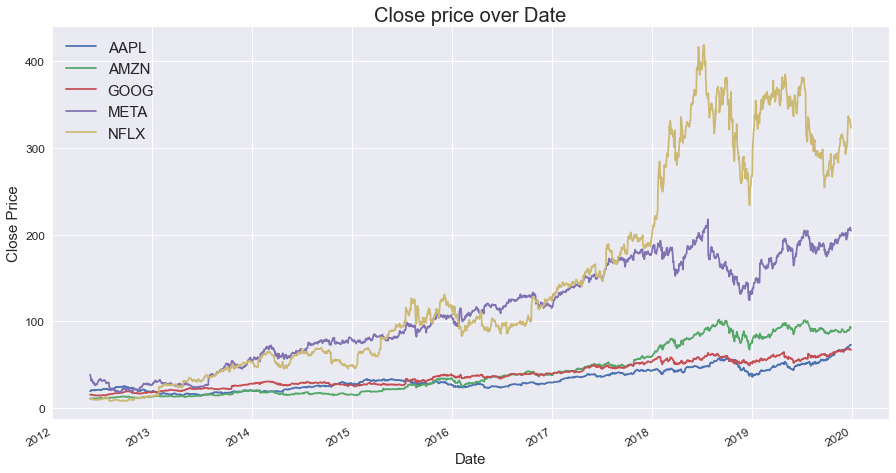

In [175]:
# Plotting the Close data to visualize the price action over the years.

plt.style.use("seaborn")

Close.plot(figsize=(15,8),fontsize=12)
plt.legend(fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Close Price",fontsize=15)
plt.title("Close price over Date",fontsize=20)

In [176]:
# (1) Check working of normalisation method on the Close data values of AAPL

Close.div(Close.iloc[0,0]).mul(100)

# Confirms Normalisation working

L2,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2012-05-18 00:00:00-04:00,100.000000,56.448209,78.945394,201.825108,52.762171
2012-05-21 00:00:00-04:00,105.826009,57.572687,80.748093,179.652322,54.104605
2012-05-22 00:00:00-04:00,105.013393,56.838874,78.997991,163.656250,51.065276
2012-05-23 00:00:00-04:00,107.575708,57.353598,80.136672,168.935484,54.232813
2012-05-24 00:00:00-04:00,106.587734,56.815115,79.374046,174.373088,52.995966
...,...,...,...,...,...
2019-12-23 00:00:00-05:00,374.825604,473.283324,356.042097,1088.472399,1758.512831
2019-12-24 00:00:00-05:00,375.181938,472.282915,354.648380,1082.876424,1759.040787
2019-12-26 00:00:00-05:00,382.625677,493.283690,359.093469,1096.971968,1756.031585


In [177]:
# Applying Normalisation to every columns of Close Dataframe 

Norm_close=Close.div(Close.iloc[0]).mul(100)
Norm_close

L2,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2012-05-18 00:00:00-04:00,100.000000,100.000000,100.000000,100.000000,100.000000
2012-05-21 00:00:00-04:00,105.826009,101.992053,102.283476,89.013861,102.544312
2012-05-22 00:00:00-04:00,105.013393,100.692077,100.066625,81.088152,96.783879
2012-05-23 00:00:00-04:00,107.575708,101.603930,101.508990,83.703898,102.787304
2012-05-24 00:00:00-04:00,106.587734,100.649988,100.542973,86.398115,100.443111
...,...,...,...,...,...
2019-12-23 00:00:00-05:00,374.825604,838.438163,450.997937,539.314662,3332.904622
2019-12-24 00:00:00-05:00,375.181938,836.665903,449.232517,536.541976,3333.905254
2019-12-26 00:00:00-05:00,382.625677,873.869520,454.863105,543.526016,3328.201922


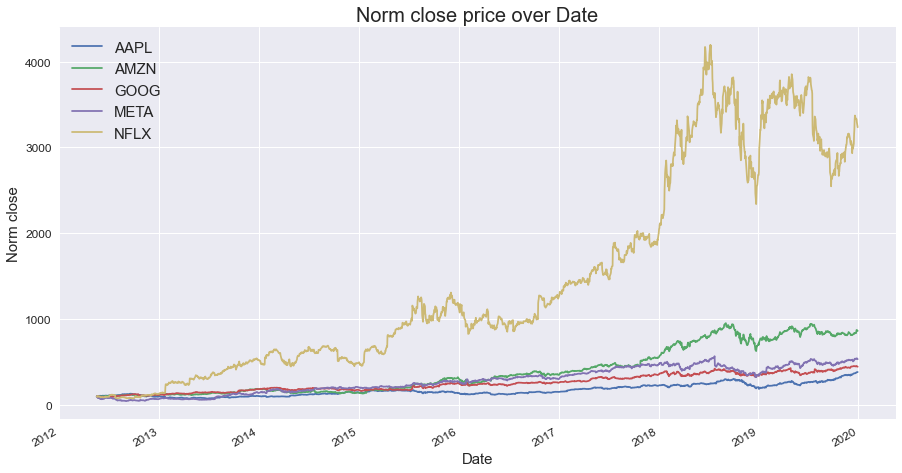

In [178]:
# Plotting the Normalized data to visualize the true sense of growth in every Stock

Norm_close.plot(figsize=(15,8),fontsize=12)
plt.legend(fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Norm close",fontsize=15)
plt.title("Norm close price over Date",fontsize=20)
plt.show()

# Shows that NFLX has highest growth compared to other Stocks

In [179]:
# Computing daily return of AAPL
# (1) Extract AAPL Close data and store it as a Dataframe object and later add below series to it. 
# (2) compute closing price difference between current and previous day
# (3) compute the percentage change and it will be the daily return

apl=Close.AAPL.to_frame()
apl["lag"]=apl.shift(periods=1)
apl["close_diff"] = apl.AAPL.sub(apl.lag)
apl["percent_change"] = apl.close_diff.div(apl.lag).multiply(100)
daily_return = apl.pct_change().dropna()
daily_mean_return = daily_return.mean().mul(100)
var_daily = daily_return.var()
std_daily = np.sqrt(var_daily)
apl.head()

,AAPL,lag,close_diff,percent_change
Date,,,,
2012-05-18 00:00:00-04:00,18.942142,NaN,NaN,NaN
2012-05-21 00:00:00-04:00,20.045713,18.942142,1.103571,5.826009
2012-05-22 00:00:00-04:00,19.891787,20.045713,-0.153927,-0.767879
2012-05-23 00:00:00-04:00,20.377144,19.891787,0.485357,2.439988
2012-05-24 00:00:00-04:00,20.190001,20.377144,-0.187143,-0.918398


In [180]:
# Computing monthly return of AAPL   
# Im order to compute monthly return we have to resample the apl dataframe

In [181]:
# Since the datetime for these stocks is different. Hence we have to set to co-ordinated Universal time and then resample

apl.index = pd.to_datetime(apl.index,utc=True)
apl_rsmpl_m = apl.AAPL.resample("M").last()
apl_rsmpl_m.head()

Date
2012-05-31 00:00:00+00:00    20.633215
2012-06-30 00:00:00+00:00    20.857143
2012-07-31 00:00:00+00:00    21.812857
2012-08-31 00:00:00+00:00    23.758572
2012-09-30 00:00:00+00:00    23.825001
Freq: M, Name: AAPL, dtype: float64

In [182]:
# On an average the stock exchange is open 21 days a month. Similarly for frequency-annual return is computed assuming 252 days open

monthly_mean_return = daily_mean_return*21
monthly_var_return = var_daily *21
monthly_std_return=np.sqrt(monthly_var_return)

# 3. Risk/Reward metric 

In [183]:
ret = Close.pct_change().dropna()
ret 

L2,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2012-05-21 00:00:00-04:00,0.058260,0.019921,0.022835,-0.109861,0.025443
2012-05-22 00:00:00-04:00,-0.007679,-0.012746,-0.021674,-0.089039,-0.056175
2012-05-23 00:00:00-04:00,0.024400,0.009056,0.014414,0.032258,0.062029
2012-05-24 00:00:00-04:00,-0.009184,-0.009389,-0.009517,0.032187,-0.022806
2012-05-25 00:00:00-04:00,-0.005360,-0.010918,-0.020094,-0.033909,-0.000711
...,...,...,...,...,...
2019-12-23 00:00:00-05:00,0.016318,0.003638,-0.000556,-0.000582,-0.011279
2019-12-24 00:00:00-05:00,0.000951,-0.002114,-0.003914,-0.005141,0.000300
2019-12-26 00:00:00-05:00,0.019840,0.044467,0.012534,0.013017,-0.001711


In [184]:
summary = ret.describe().T.loc[:,["mean","std"]]
summary["mean"] = summary["mean"]*252
summary["std"]=summary["std"]*np.sqrt(252)
summary.index

Index(['AAPL', 'AMZN', 'GOOG', 'META', 'NFLX'], dtype='object', name='L2')

Text(0.5, 1.0, 'Risk/Reward ')

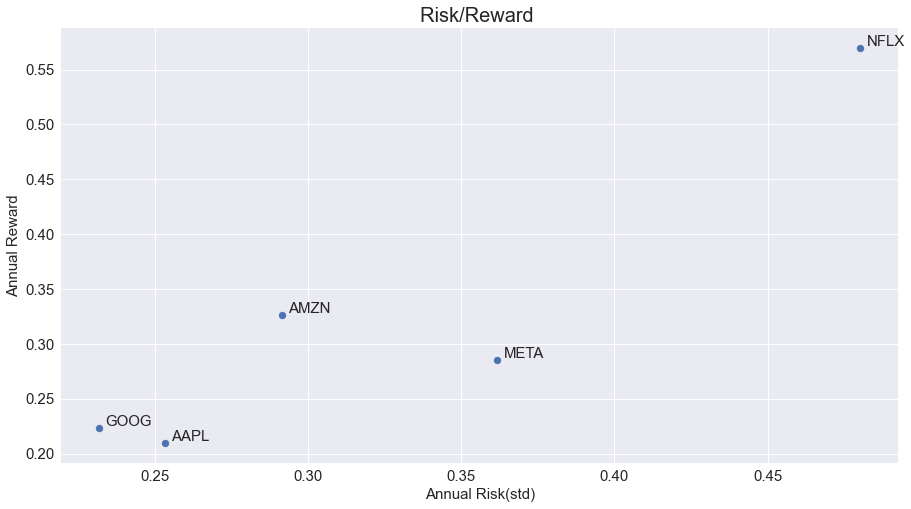

In [185]:
summary.plot.scatter(x="std",y="mean",figsize=(15,8),s=50,fontsize=15)
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,"std"]+0.002,summary.loc[i,"mean"]+0.002),size=15)
plt.xlabel("Annual Risk(std)",fontsize=15)
plt.ylabel("Annual Reward",fontsize=15)
plt.title("Risk/Reward ",fontsize=20)

In [186]:
# Above scatter plot we can infer that:
#  (1) For low risk Google has given better returns than Apple 
#  (2) For moderate risk Amazon has given better returns than Meta
#  (3) For fairly high risk Netfilx is the

In [187]:
summary.max()["mean"]

0.5699630888204545

# 4. Portfolio diversification method

In [188]:
ret.cov()

L2,AAPL,AMZN,GOOG,META,NFLX
L2,,,,,
AAPL,0.000254,0.000110,0.000099,0.000104,0.000096
AMZN,0.000110,0.000338,0.000156,0.000168,0.000220
GOOG,0.000099,0.000156,0.000214,0.000138,0.000165
META,0.000104,0.000168,0.000138,0.000520,0.000167
NFLX,0.000096,0.000220,0.000165,0.000167,0.000916


In [189]:
ret.corr()

L2,AAPL,AMZN,GOOG,META,NFLX
L2,,,,,
AAPL,1.000000,0.376400,0.426406,0.285907,0.198645
AMZN,0.376400,1.000000,0.580450,0.400438,0.396309
GOOG,0.426406,0.580450,1.000000,0.414404,0.372271
META,0.285907,0.400438,0.414404,1.000000,0.241966
NFLX,0.198645,0.396309,0.372271,0.241966,1.000000


<AxesSubplot:xlabel='L2', ylabel='L2'>

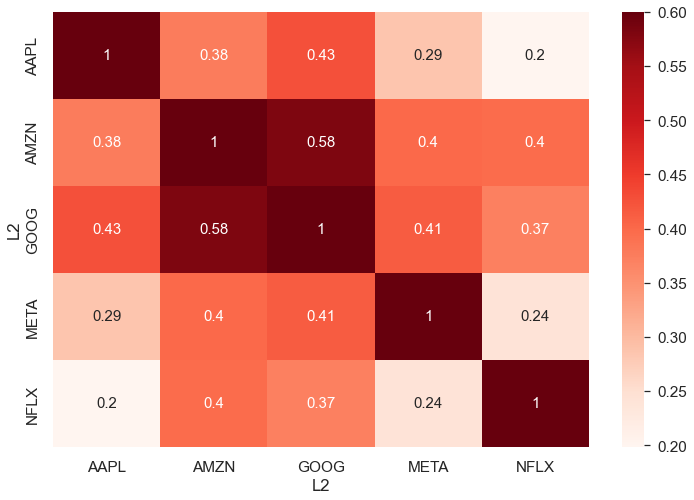

In [190]:
# Covariance and Correlation data can be visualized using heat

plt.figure(figsize=[12,8])
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(),cmap="Reds",annot=True,annot_kws={"size":15},vmax=0.6)

In [191]:
# The heatmap is very helpful in visualising the correlation data. 
# This can be used as an initial strategy/filter for diversifying portfolios. That is during a recession, if your portfolio contains highly correlated stocks, then it is very likely that if one stock falls, other correlated stocks are likely to follow.